<a href="https://colab.research.google.com/github/abhinav4201/Capstone-Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color='#FF3206'>Seoul Bike Sharing Demand Prediction**

---

## **Problem Statement** 

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


<center><h2>“Identify your problems, but give your power and energy to solutions.”</h2></center>
<p align=right><b>~ Tony Robbins</b>, American author, coach, speaker, and philanthropist</p><br>

<center><img src="https://drive.google.com/uc?id=1GaFF-s0Q0Ad6XSVAdNTMCehB5-xtb5df" width = "50%" height="360vh"/> </center>

##**Importing Required Libraries**

---

All required libraries are imported at once in order to have smooth workflow. These libraries have used in data manipulation, plotting graphs, modelling etc.

In [1]:
#data visualization libraries(matplotlib,seaborn)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf


# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more 
# suitable for the downstream estimators. 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error


# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

## **Loading Data**

---

In order to proceed, we have to bring in data into the playground. This is basically the raw data which we will filter into features so that it can be used to build the predictive model.

In [52]:
#here google drive is attached to colab so that files can be accessed easily
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Bike Prediction data is stored in google drive as "SeoulBikeData.csv", path for data is stored in a variable
dataPath = "/content/drive/MyDrive/almabetter/Supervised-ML-Regression/Regression-Bike Sharing Demand Prediction/Data/SeoulBikeData.csv"

# the variable(dataPath) is used to load data into the colab notebook using pandas
b_data = pd.read_csv(dataPath)

#there was error while loading data, therefore used excel to convert it into proper file, this can also be
#achieved using pandas by just passing 'encoding = "ISO-8859-1"' with read_csv
#i.e b_data = pd.read_csv(dataPath, encoding = "ISO-8859-1)

##**Studying Data (Data Wrangling)**

---

Basic information about data is studied using head, info, describe function.

In [65]:
#displaying data from file using head function 
b_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.500,38,0.800,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.000,39,1.000,2000,-17.700,0.000,0.000,0.000,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.200,40,0.900,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.000,36,2.300,2000,-18.600,0.000,0.000,0.000,Winter,No Holiday,Yes


### **Different features and their description**
   
> A feature is an input variable in simple linear regression. A simple machine learning project might use a single feature, while a more sophisticated machine learning 
project could use millions of features.

#### **Describing DataSet**

---
<b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


#### <b>Attribute Information: </b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [66]:
#describing dataset to get Statistical info
b_data.describe().T             #.T is used to transpose the table

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.000,704.602,644.997,0.000,191.000,504.500,1065.250,3556.000
Hour,8760.000,11.500,6.923,0.000,5.750,11.500,17.250,23.000
Temperature(°C),8760.000,12.883,11.945,-17.800,3.500,13.700,22.500,39.400
Humidity(%),8760.000,58.226,20.362,0.000,42.000,57.000,74.000,98.000
Wind speed (m/s),8760.000,1.725,1.036,0.000,0.900,1.500,2.300,7.400
Visibility (10m),8760.000,1436.826,608.299,27.000,940.000,1698.000,2000.000,2000.000
Dew point temperature(°C),8760.000,4.074,13.060,-30.600,-4.700,5.100,14.800,27.200
Solar Radiation (MJ/m2),8760.000,0.569,0.869,0.000,0.000,0.010,0.930,3.520
Rainfall(mm),8760.000,0.149,1.128,0.000,0.000,0.000,0.000,35.000
Snowfall (cm),8760.000,0.075,0.437,0.000,0.000,0.000,0.000,8.800


*   For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type.

* We may not need to perform extensive data cleansing because the ranges of values in the numerical columns appear fair as well. However,columns like **Wind speed** , **Dew point temperature(°C)**, **Solar Radiation**, **Rainfall** and **Snowfall** appears to be skewed as their **median** (50 percentile) is much **lower** than the **highest value**.

In [67]:
#@title Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [68]:
#@title printing shape of the dataset
print(f'Shape : {b_data.shape} \n' )
b_data.columns

Shape : (8760, 14) 



Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

> * The dataset has total number of 8760 values with 14 different features. Luckily, there are no null values.
> * There are 10 numerical [ 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',  'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)' ] and 4 categorial feature ('Date', 'Seasons', 'Holiday', 'Functioning Day').
> * However, date has data type of object which should be further treated to have correct data type and as per data description hour represents timestamp but it has int data type which should also be treated further.

In [69]:
#checking null values for confirmation
b_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [70]:
#checking for duplicates
b_data.duplicated().value_counts()

False    8760
dtype: int64

* **Dataset has 8760 unique value and there is no repetition.**

**Changing Date data type**

In [71]:
#creating copy to keep oringal data safe
df = b_data.copy()

In [72]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

### Extracting date, month, year from date and adding to dataset

In [73]:
#Extracting month from date column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
df['day'] = df['Date'].dt.day_name()

#Extracting year
df['year'] = df['Date'].dt.year.astype('object')

df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,year
0,2017-01-12,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Jan,Thursday,2017


In [74]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,year
0,254,0,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,Winter,No Holiday,Yes,Jan,Thursday,2017


* Here, **hour** feature has numerical value but it explains timestamp, so it should be treated as categorial feature.

In [75]:
# converting hour feature into categorial by changing is type 
df['Hour']=df['Hour'].astype('object')

* Categorial data are those values which can be used to classify information based on similarities.

* Numerical data is the information expressed numerically.

## **Exploratory Data Analysis**

---
Primary goal was to explore data, to identify relationship between different features to answer the question to achieve the objective of the project using **univariate analysis**, **bivariate analysis** and **multivariate analysis**. 

> What feature will help in achieving stable bike demand every hour?

### **VISUALIZATION**

---

Different form of charts are used to visualize data with respect to bike count (target value), to know how it can be related to other features. Visualization is carried out using **seaborn** and **matplotlib** library.

In [76]:
#creating copy
dfr = df.copy()

In [77]:
#storing numerical feature in separate variable
num_feature = dfr.select_dtypes(exclude='object')
num_feature.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [78]:
#storing categorial feature in separate variable
cat_feature = dfr.loc[:,  ~dfr.columns.isin(num_feature.columns.to_list())]
cat_feature.columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'day',
       'year'],
      dtype='object')

#### **Univariate Analysis**

In [79]:
#analysing numerical value using density plot with mean and median
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#055E85');
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=2,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

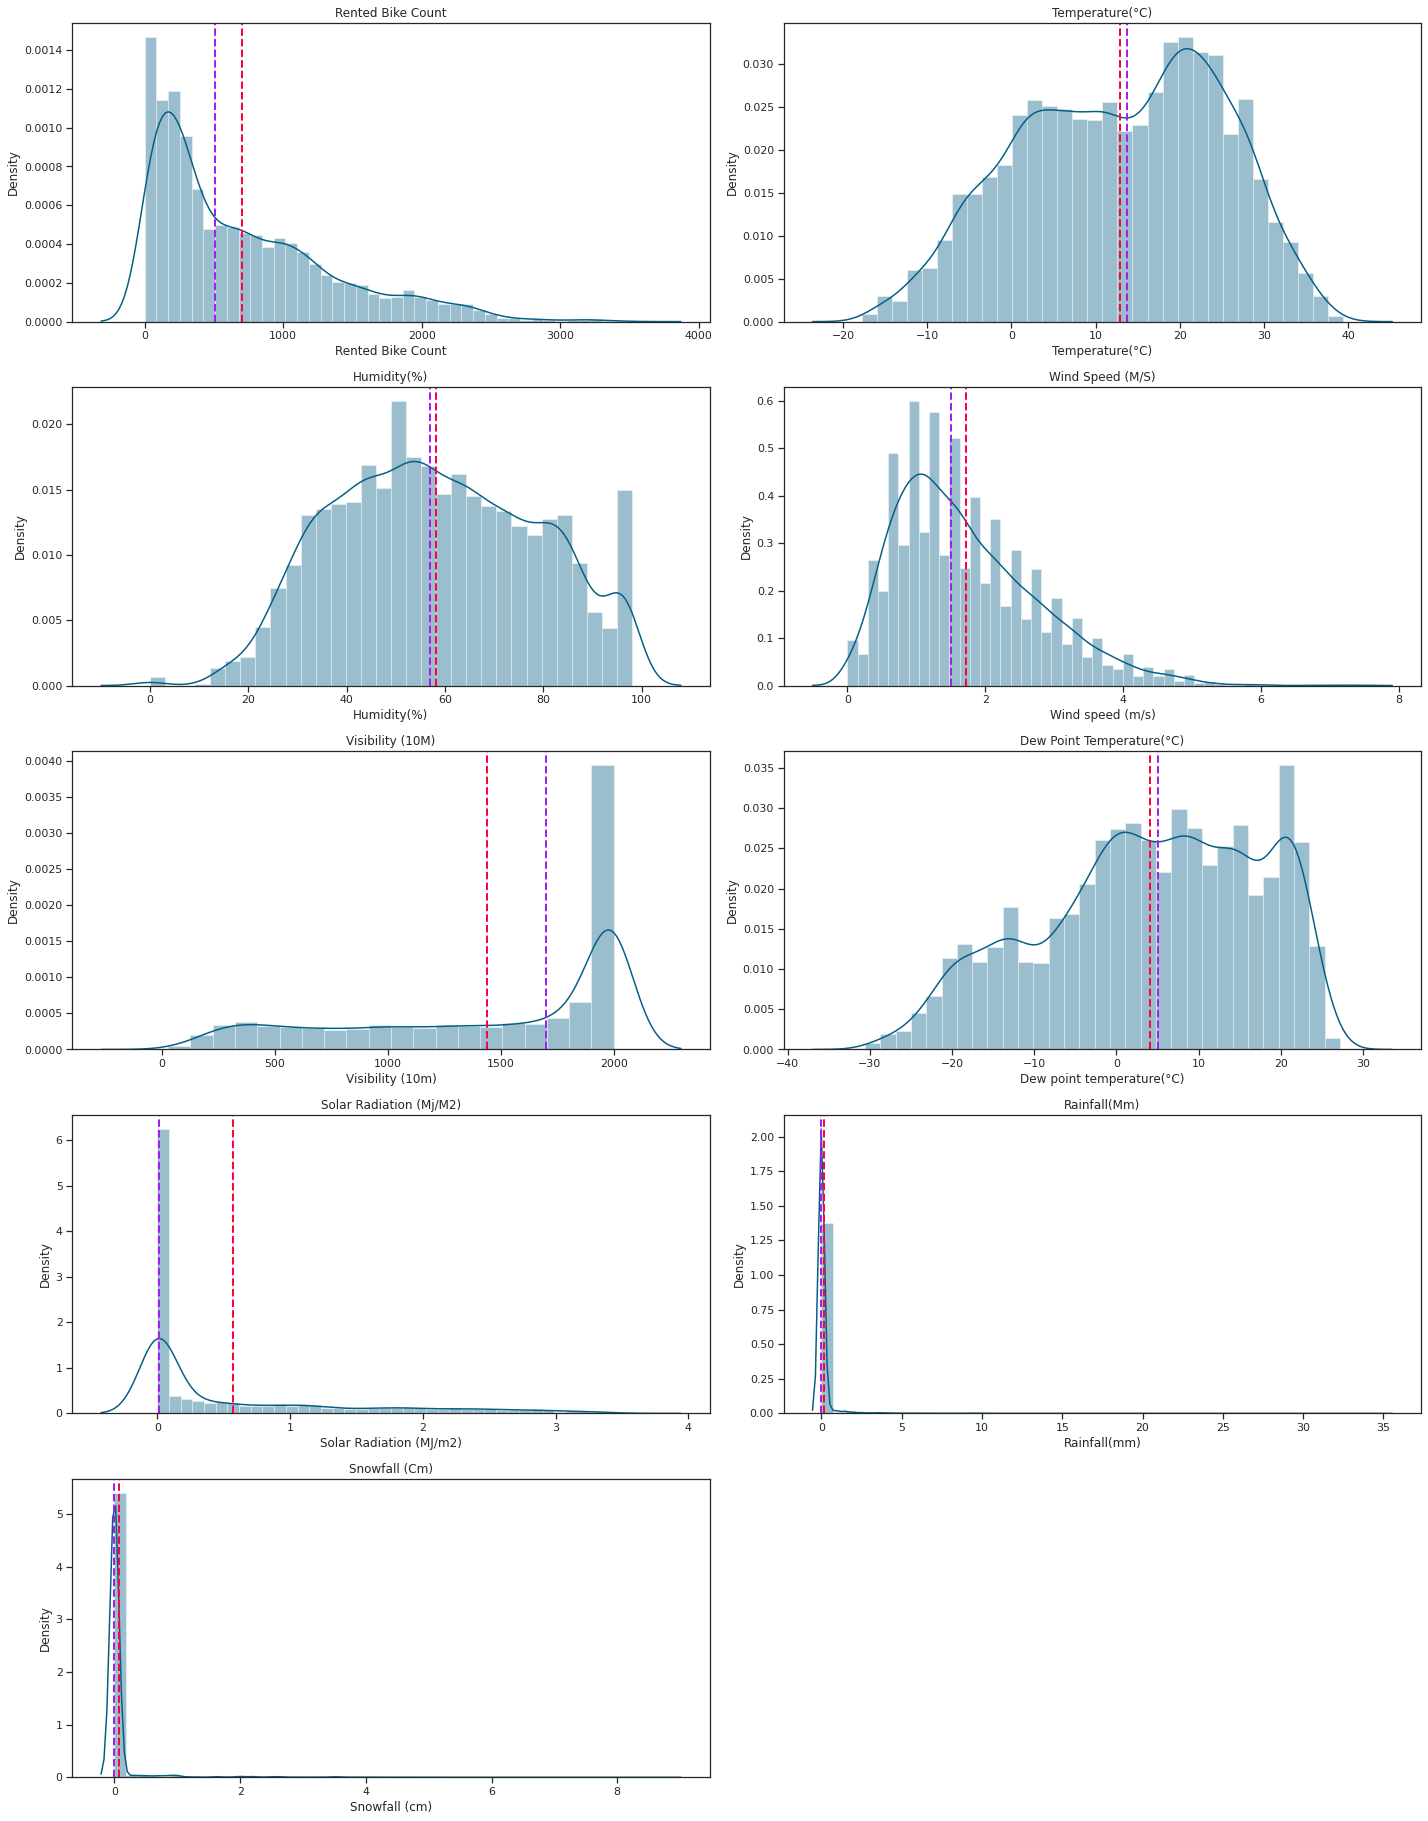

In [80]:
density_plot(dfr,num_feature)

In [81]:
dfr.agg(['skew', 'kurtosis']).T

,skew,kurtosis
Rented Bike Count,1.153,0.853
Hour,0.000,-1.204
Temperature(°C),-0.198,-0.838
Humidity(%),0.060,-0.804
Wind speed (m/s),0.891,0.727
Visibility (10m),-0.702,-0.962
Dew point temperature(°C),-0.367,-0.755
Solar Radiation (MJ/m2),1.504,1.126
Rainfall(mm),14.533,284.991
Snowfall (cm),8.441,93.803


* From the above graph we can summarise that:
  
  **Right**/Positive Skewed Distribution: Mode < Median < Mean: **Rented Bike Count**, **Wind Speed(m/s)**, **Solar Radiation(MJ/m2)**

  **No Skew**: Mean = Median = Mode : **Hour**, **Temperature**, **Humidity(%)**,**Rainfall(mm)**,**Snowfall(cm)**

  **Left**/Negative Skewed Distribution: Mean < Median < Mode: **visibility(10m)**

#### **Bivariate Analysis**

<Figure size 1080x432 with 0 Axes>

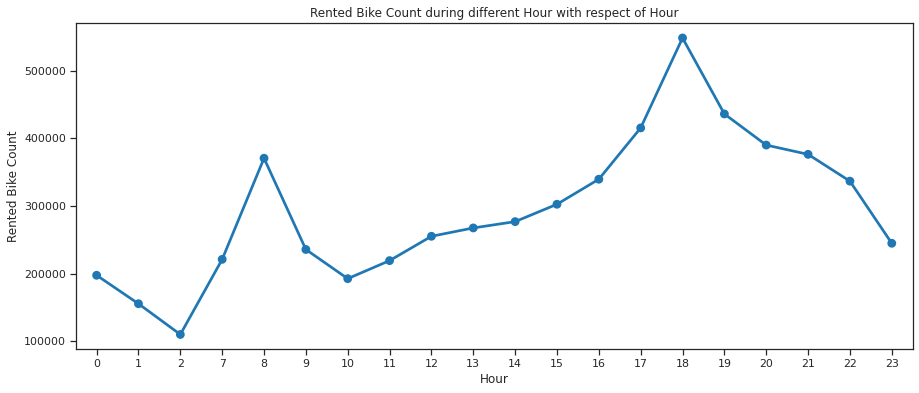

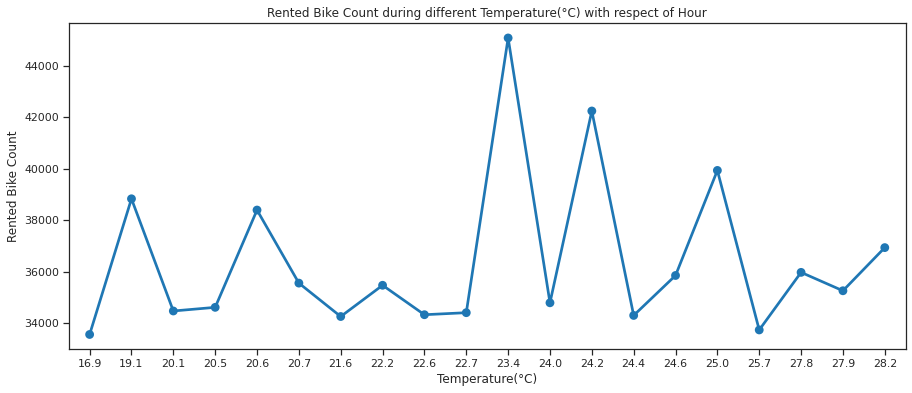

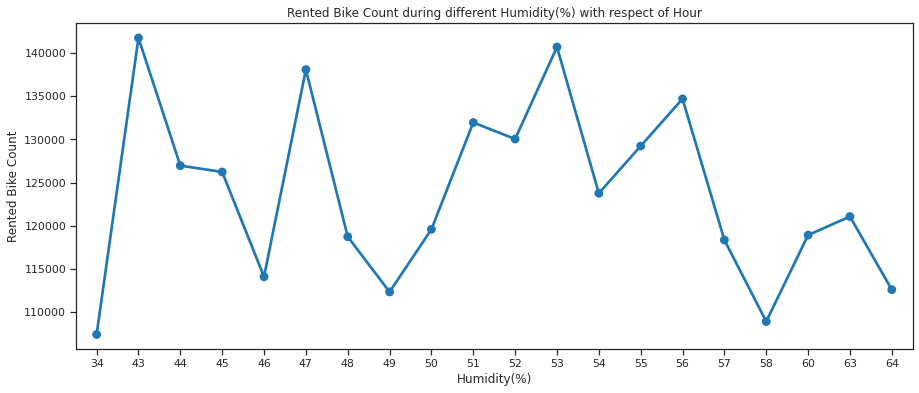

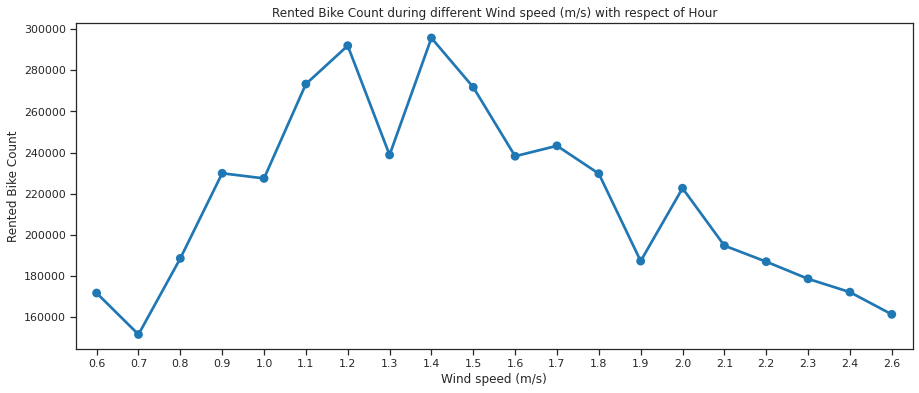

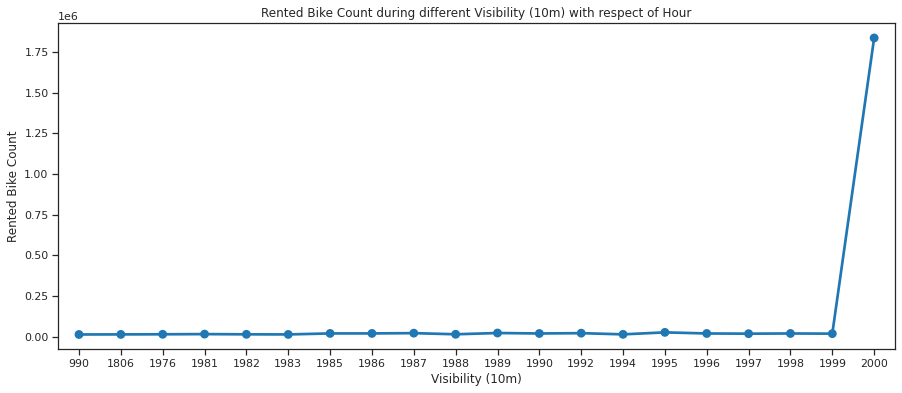

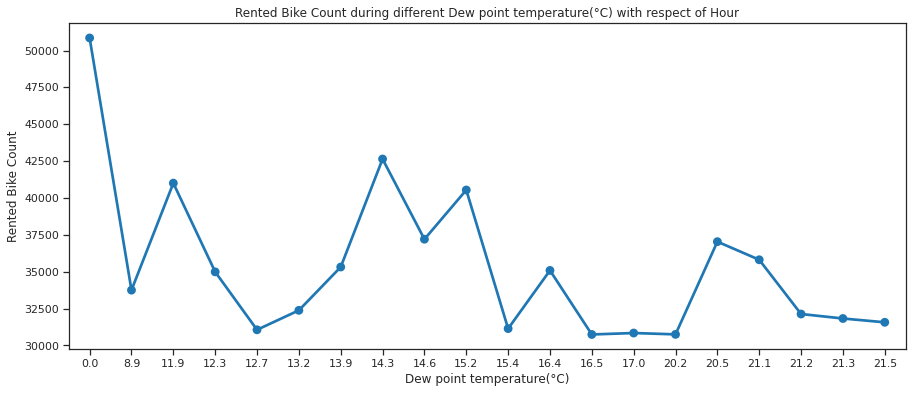

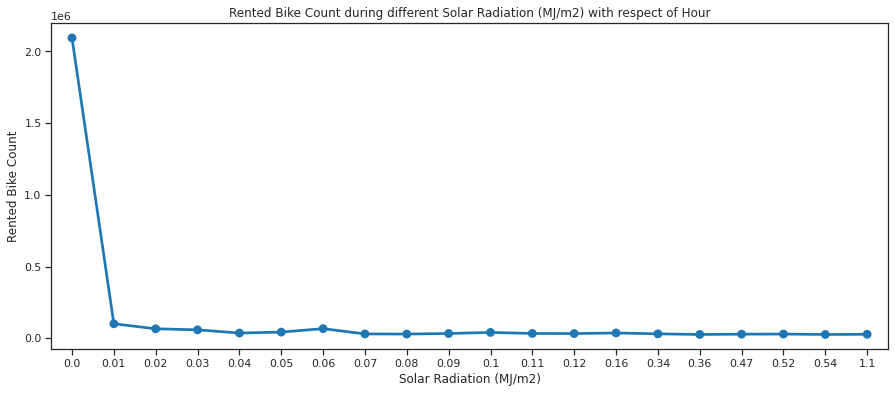

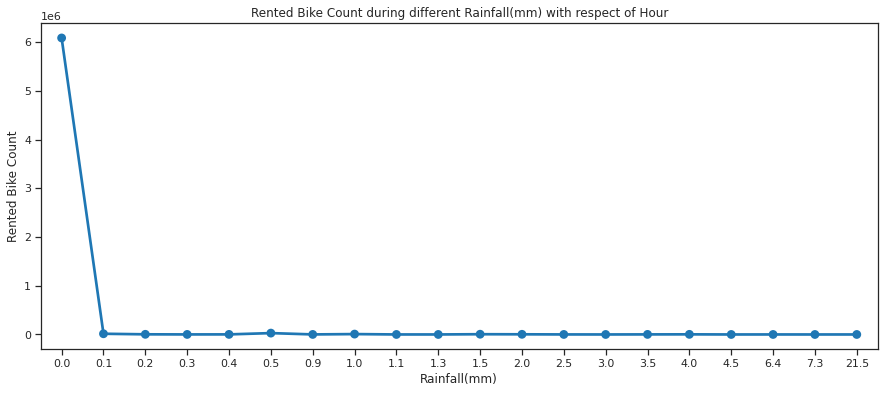

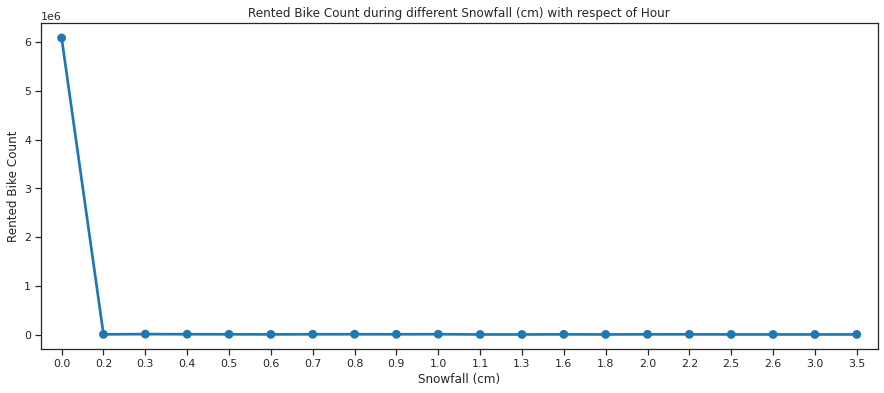

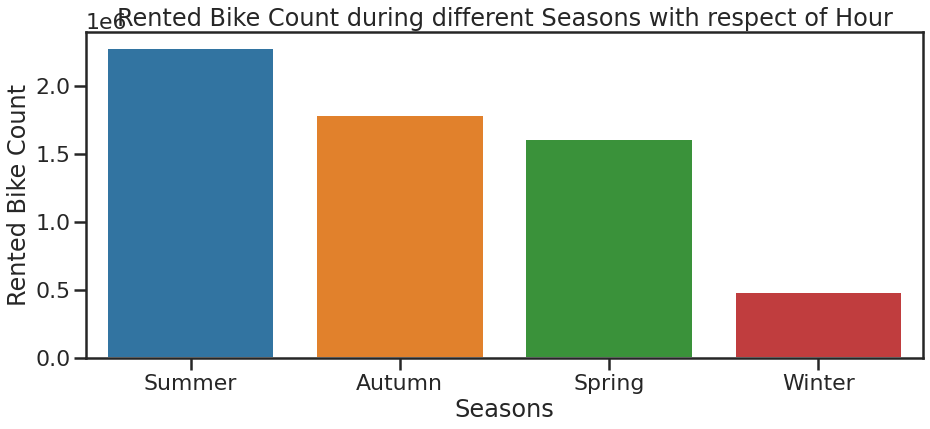

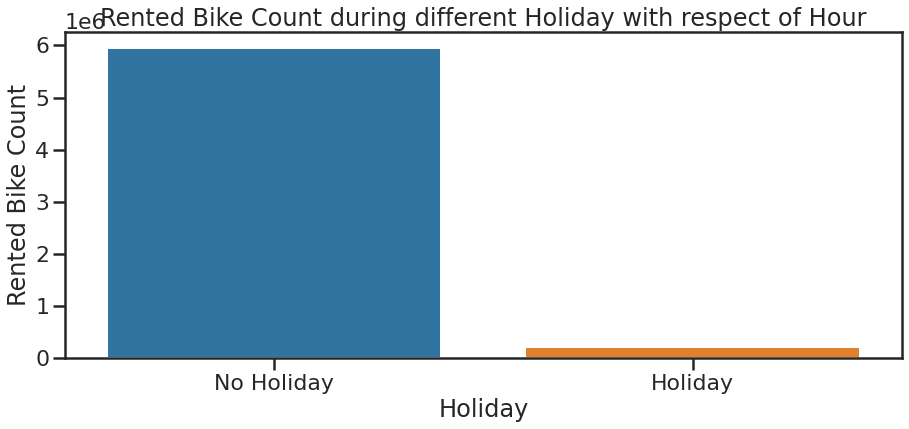

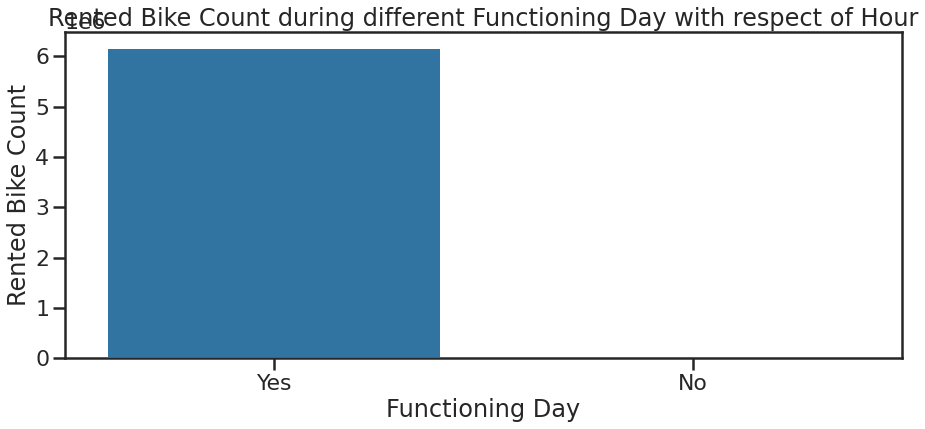

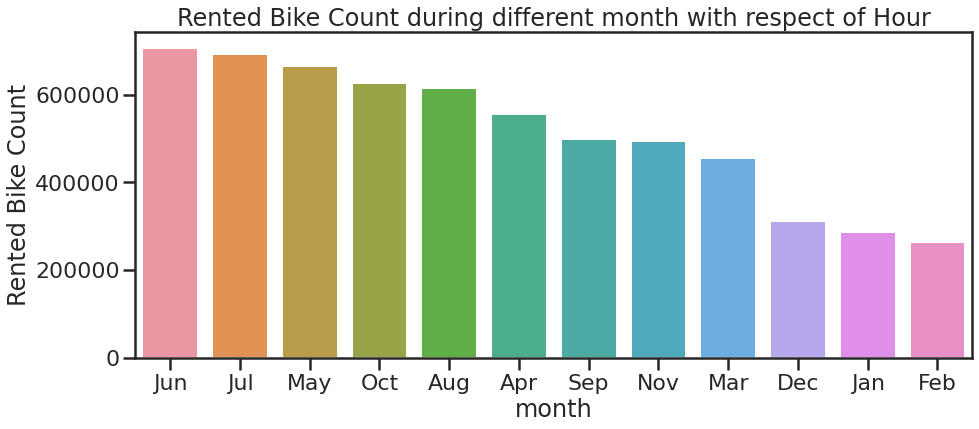

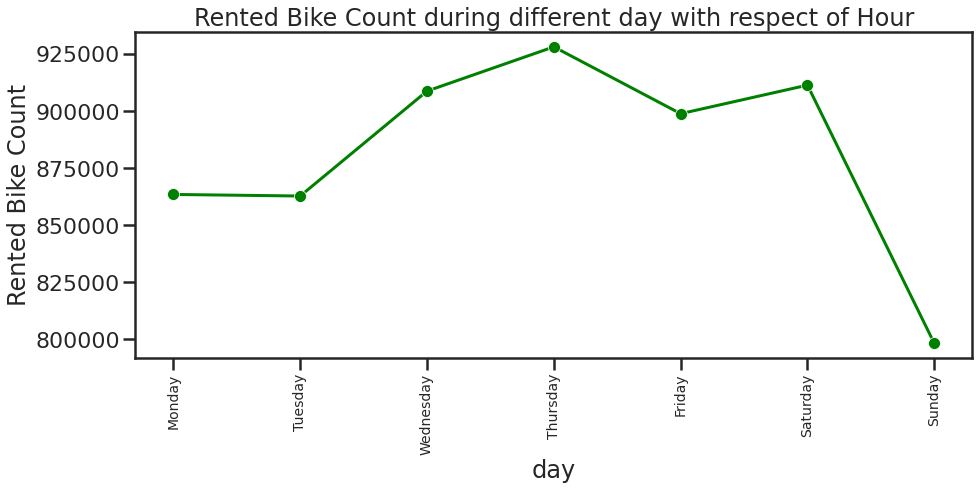

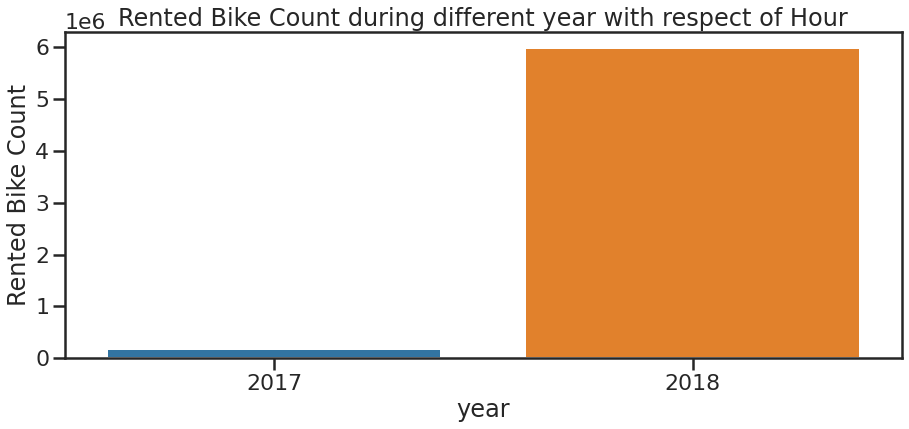

In [82]:
#comparing different feature with bike count 
for i in dfr.columns:
  plt.figure(figsize=(15,6))
  if i == 'Rented Bike Count':
    pass
  elif i in ['Seasons','Holiday','Functioning Day','month','year']:
    grp = dfr.groupby([i], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count',
                                                                                    ascending = False)
    sns.set_context('poster')
    sns.barplot(x=grp[i], y=grp["Rented Bike Count"])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
    print('\n')
  elif i == 'day':
    weekdays = {'day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    weekday = pd.DataFrame(weekdays)
    grp = dfr.groupby([i], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count',
                                                                                    ascending = False)
    chart = weekday.merge(grp)
    sns.set_context('poster')
    sns.lineplot(data= chart, x=chart[i],y= chart['Rented Bike Count'], marker= 'o', color = 'green');
    plt.xticks(fontsize = 14, rotation = 90);
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  else :
    grp = dfr.groupby([i], as_index = False)['Rented Bike Count'].sum().sort_values('Rented Bike Count',
                                                                                    ascending = False).head(20)
    sns.set_context('notebook')
    sns.pointplot(x=grp[i], y=grp["Rented Bike Count"])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
    print('\n')

  plt.show()

* For features like year, functioning day, holiday and season, it can be categorised as 2 or 4 category. Therefore, it is better to check their values again separately, specially with functioning day and holiday as further analysis can help in dropping some of the unwanted values. 

In [83]:
#groupby function for finding sum with respect to categorial features
def group_by(df,feature):
  data = df.groupby([feature], as_index = False)['Rented Bike Count'].sum()
  return data

In [84]:
#rented bike count with respect to functioning day
group_by(dfr,'Functioning Day')

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


In [85]:
#rented bike count vs holiday
group_by(dfr,'Holiday')

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


In [86]:
#rented bike count with respect to year
group_by(dfr,'year')

,year,Rented Bike Count
0,2017,185330
1,2018,5986984


In [87]:
#rented bike count with respect to season
group_by(dfr,'Seasons')

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


* If it is a non functioning day, total bike rented count is zero. Therefore, we can remove those value and then the entire column as it will not fall under any category.

In [88]:
#Removing data of non functional days with no rented bike
value = dfr.drop(dfr[dfr['Functioning Day'] == 'No'].index)

In [89]:
value['Functioning Day'].value_counts()

Yes    8465
Name: Functioning Day, dtype: int64

In [90]:
#Removing entire functional day column as it of no use
value = value.drop(['Functioning Day'], axis = 1)
value.shape

(8465, 15)

In [91]:
#shape of new dataset 
print(f'Shape of original data: {b_data.shape}')
print(f'Shape of new data : {value.shape}')

Shape of original data: (8760, 14)
Shape of new data : (8465, 15)


* From the above graph and analysis, it can be stated that 
  1. If it is a non functioning day, rented bike count is zero.
  2. As seson changes from summer to winter, demand for bike decreases.
  3. Above point is also proved when month is plotted against bike demand, it is observed that demand gradually decreased as we moved from summer to winter and has lowest demand in Febuary.
  4. Bike demand on holiday is less than that on working day.
  5. Every week demand for bike gradually increases, however on weekend, one can see a less amount of demand, which further can help us in categorizing day as weekday and weekend.


In [92]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
value['week'] = value['day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [93]:
value.week.value_counts()

Weekdays    6024
Weekend     2441
Name: week, dtype: int64

#### **Multivariate Analysis**

In [94]:
#getting categorial values
cat_feature = value.select_dtypes(include='object')

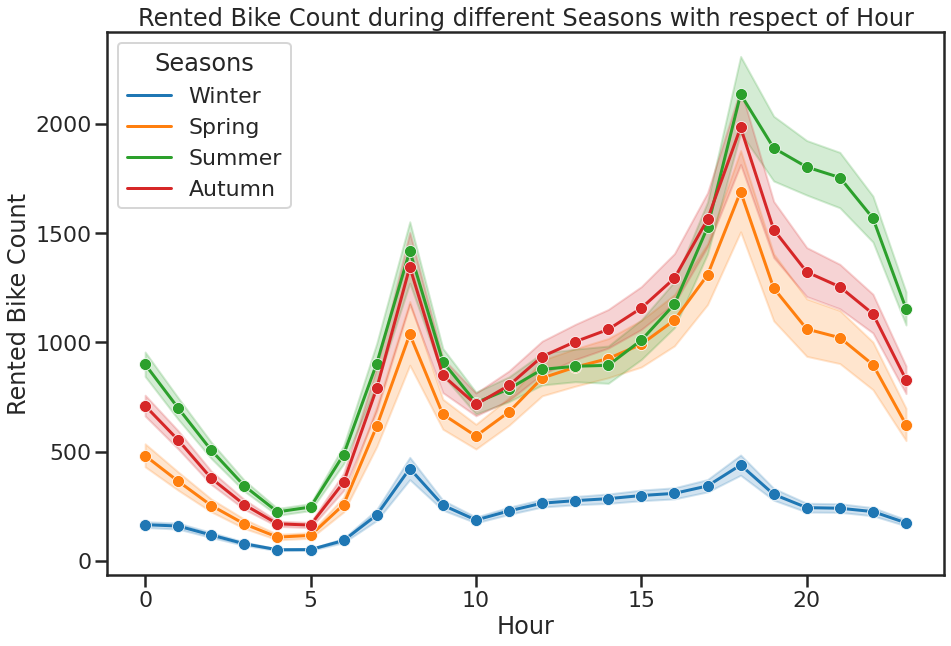

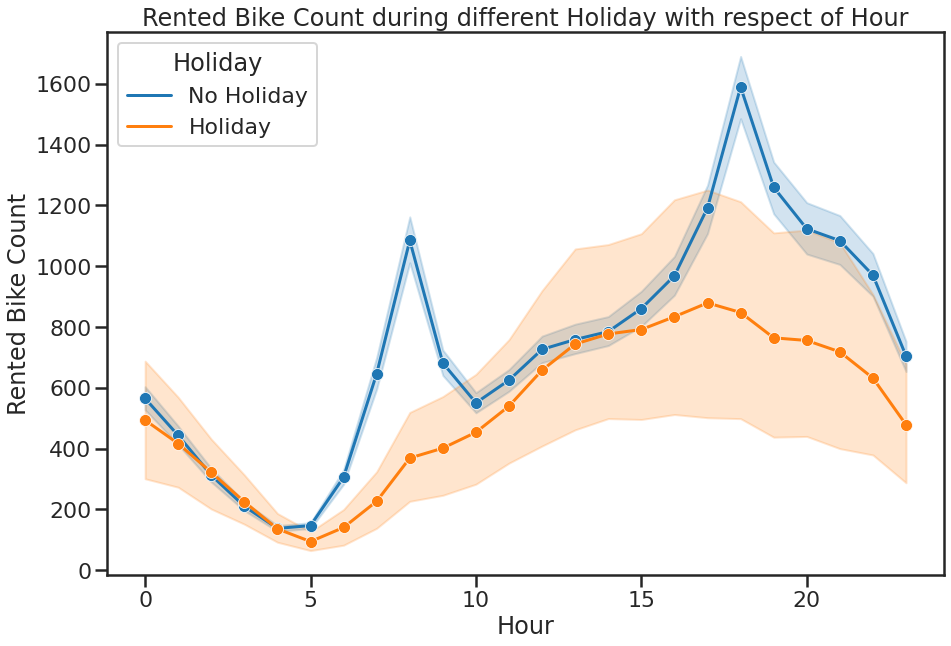

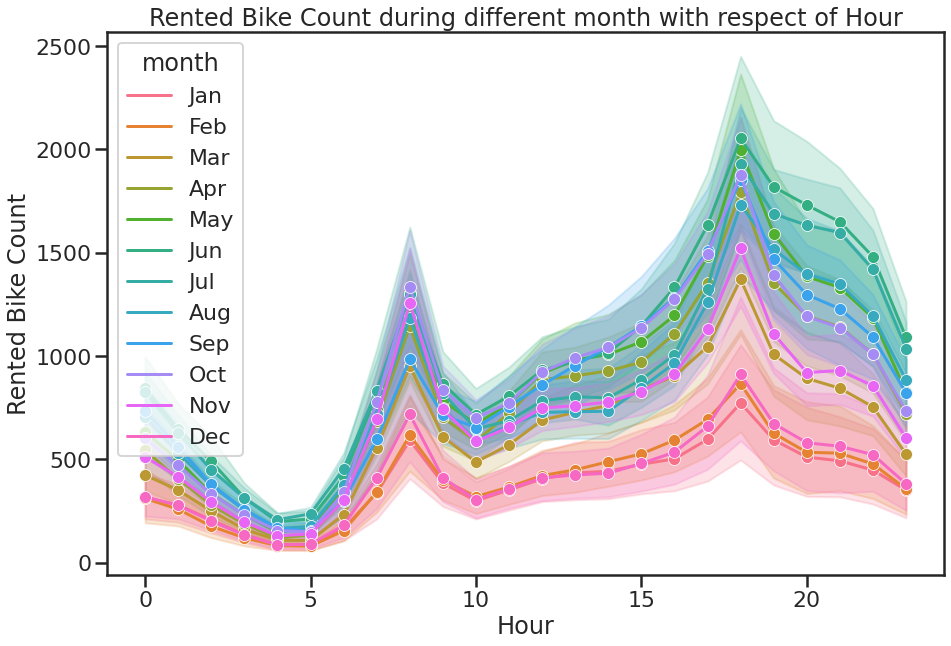

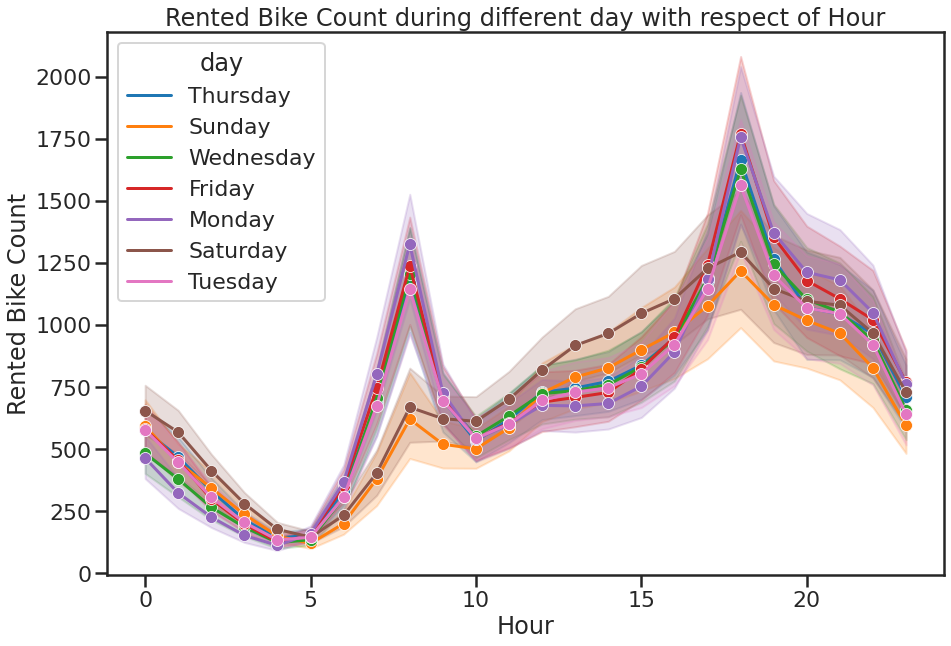

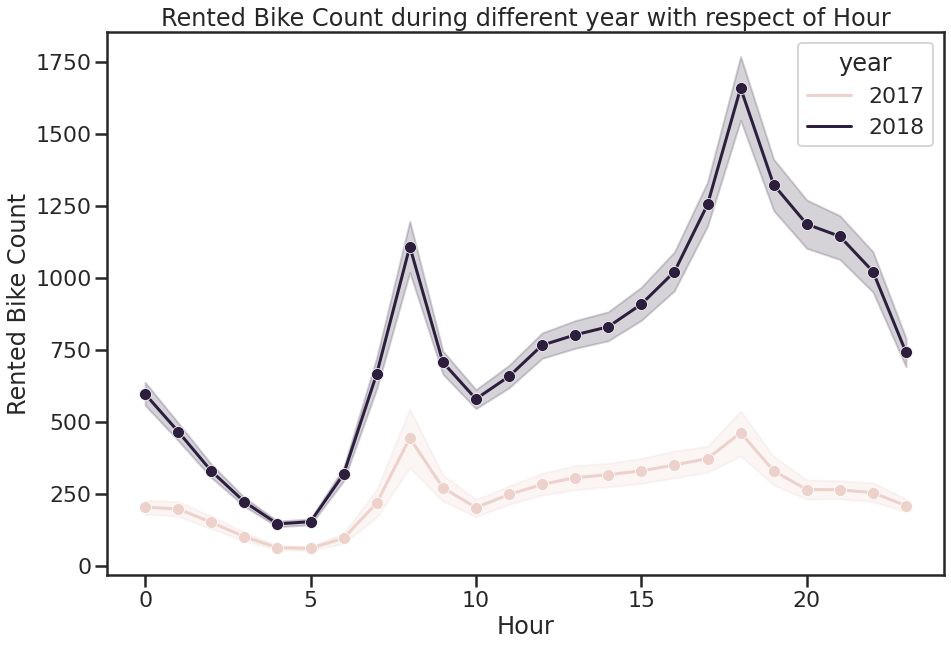

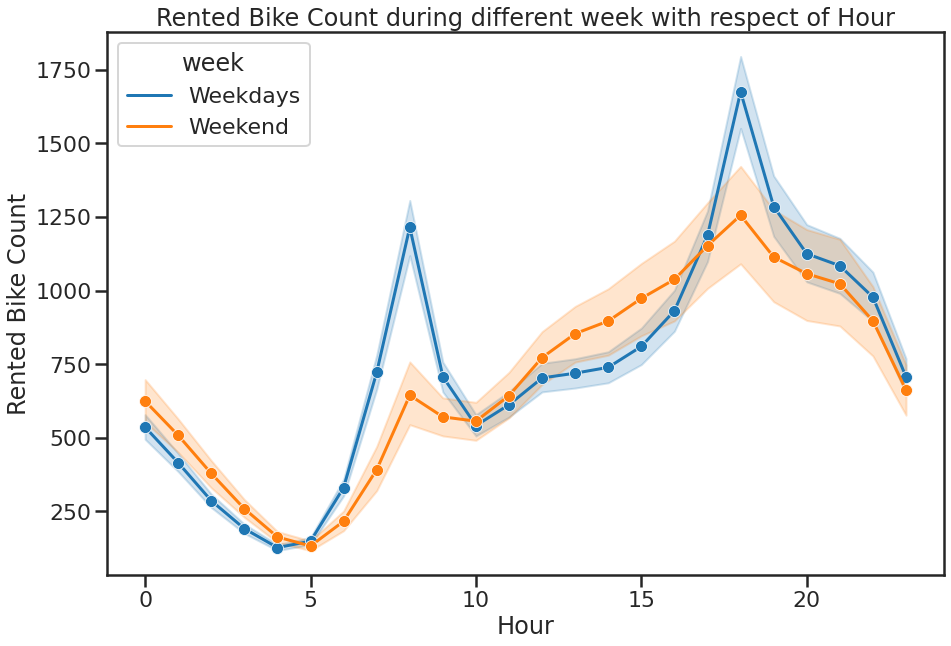

In [95]:
#analysing hour with bike demand with respect to different third value

for i in cat_feature:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,10))
    sns.lineplot(x=value["Hour"],y=value['Rented Bike Count'],hue=value[i], marker ='o')
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

In [96]:
value.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'month', 'day', 'year', 'week'],
      dtype='object')

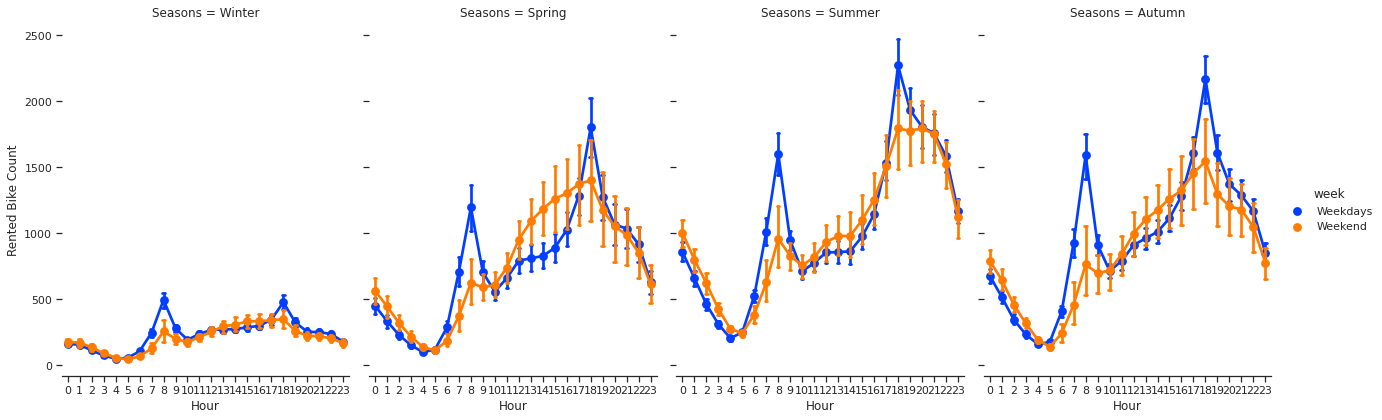

In [97]:
# Draw a pointplot to show bike demand as a function of three categorical factors
sns.set_context('notebook')
g = sns.catplot(
    data= value, x="Hour", y="Rented Bike Count", hue="week", col="Seasons",
    capsize=.2, palette="bright", errorbar="se",
    kind="point", height=6, aspect=.75,
);
g.despine(left=True);



* For every season,bike count is high on weekday day compared to weekends, i.e., demand on weekday is more.

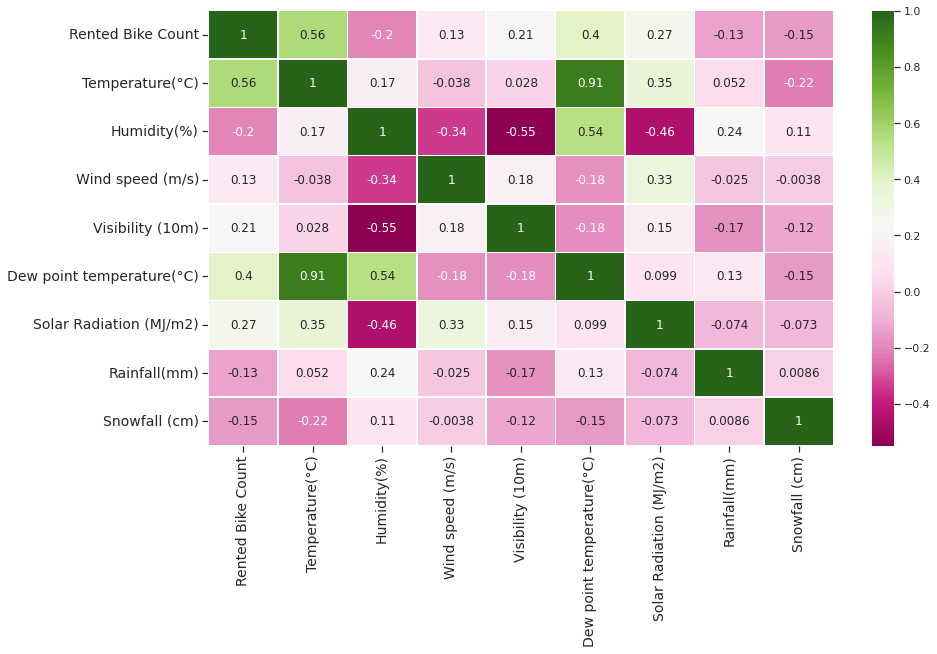

In [98]:
# plotting heatmap with correlation value to check relation between multiple variable
sns.set_context('notebook')
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(value.corr(), annot=True, linewidth=.5,cmap="PiYG");

* If two variable or features show relationship either in same or opposite direction, then these variables thus show correlation between them. 
* Feature like **Temperature**(°C) and **Dew point temperature**(°C) **show** very high correlation which can cause **multicollinearity**.

### **CONCLUSION**

* From the above EDA, these are some conclusions:
  
  1. Features like Rented Bike Count, Wind Speed(m/s) and Solar Radiation(MJ/m2) shows positive skewness.
  2. Feature visibility(10m) shows negative skewness.
  3. Demand for bike is more during moring and evening mostly around 7-9 in morning and 6-8 in evening.
  4. Demand for bike is more during weekdays than on weekend.
  5. Demand for bike is zero on non functional day.
  6. Demand of bike is less on holiday.
  7. Demand of bike is more during summer than in winter.

## **Feature Engineering**

### **Outliers**

In [99]:
#checking outliers using box plot
def box_plot(df,feature):
  i=1
  for col in feature.columns :
    plt.figure(figsize = (20,20))
    plt.subplot(5,2,i);
    i=i+1
    if df[col].dtypes == 'object':
      sns.boxplot(x=df[col],y=df["Rented Bike Count"]);
      print('\n')
    else:
      sns.boxplot(df[col]);
      print('\n')
    plt.xticks(fontsize = 18, rotation = 90);
    plt.tight_layout();

In [100]:
cat_feature = value.select_dtypes(include ='object')

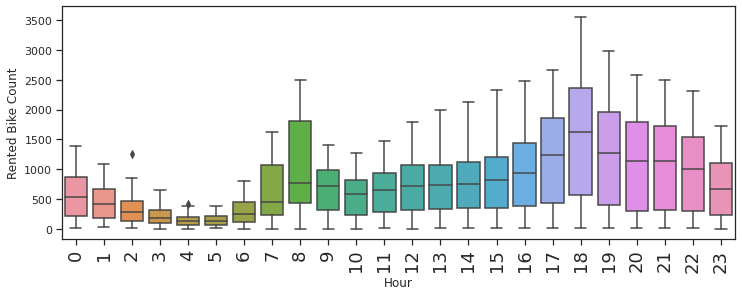

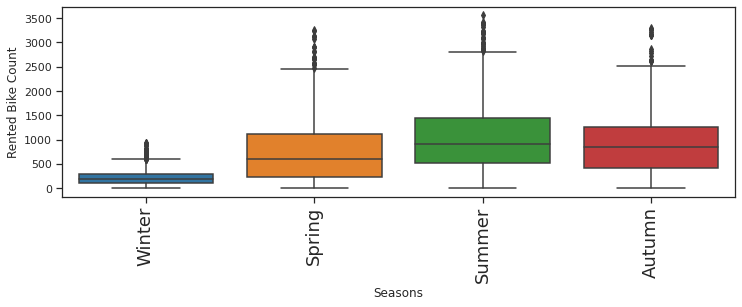

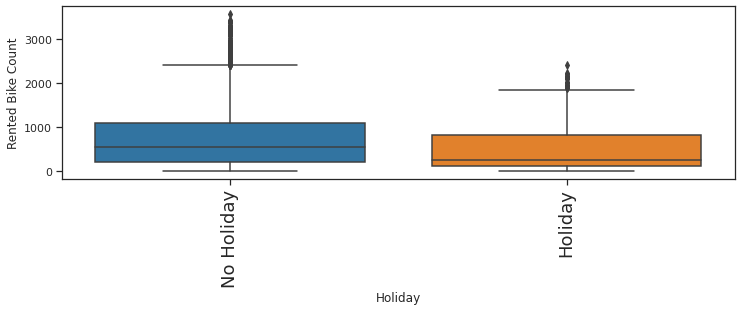

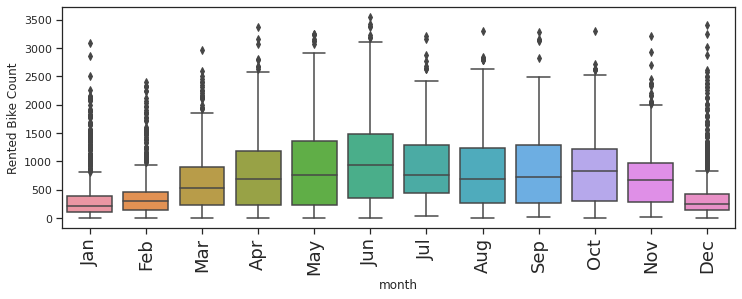

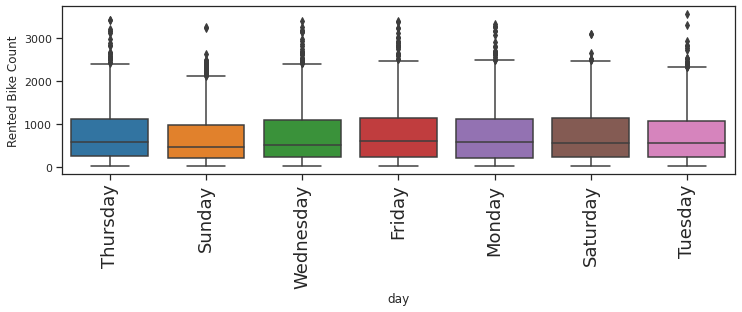

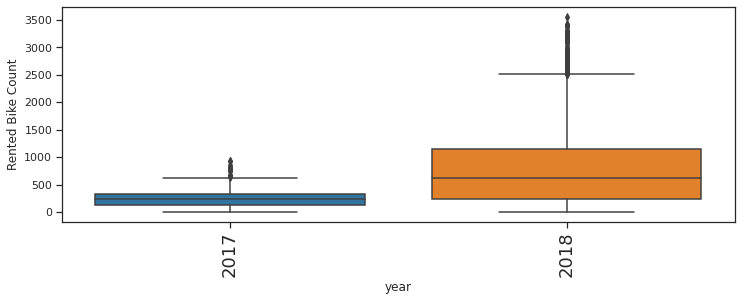

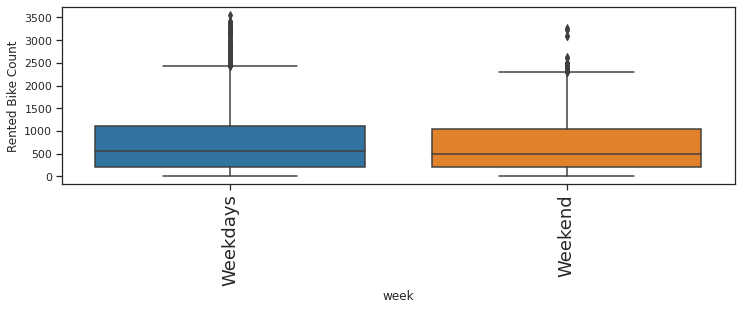

In [101]:
box_plot(value,cat_feature)

In [102]:
num_feature = value.select_dtypes(exclude = 'object')

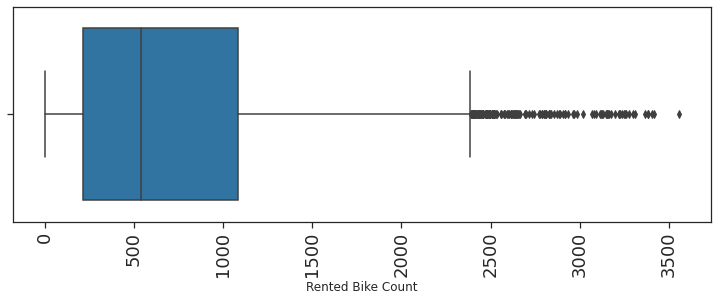

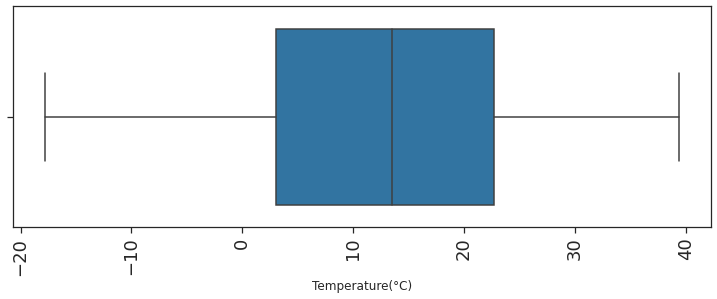

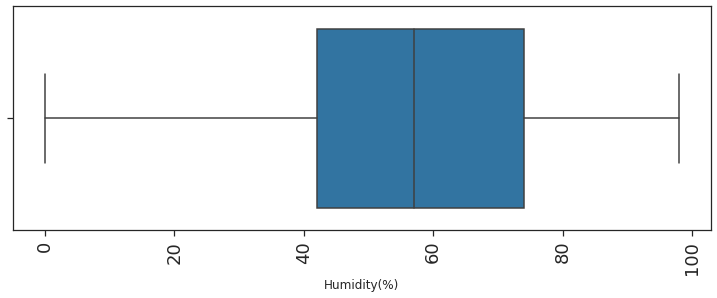

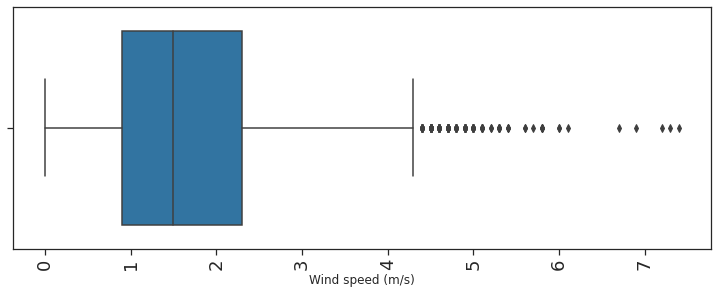

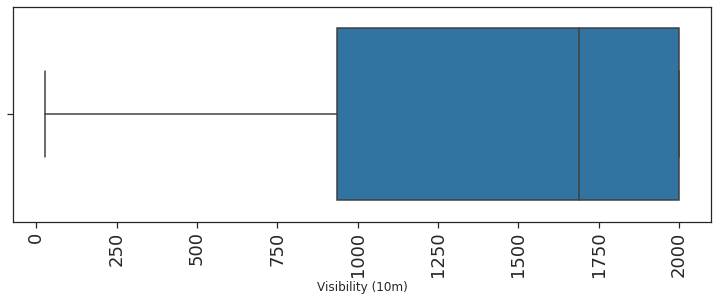

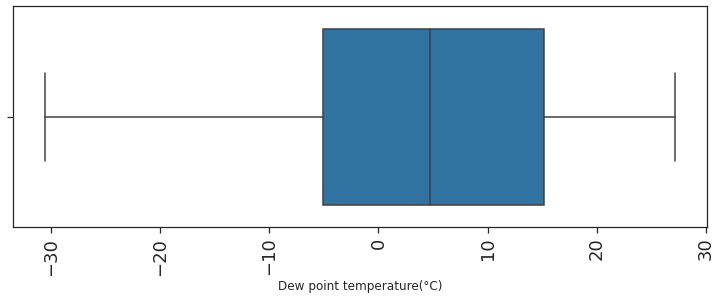

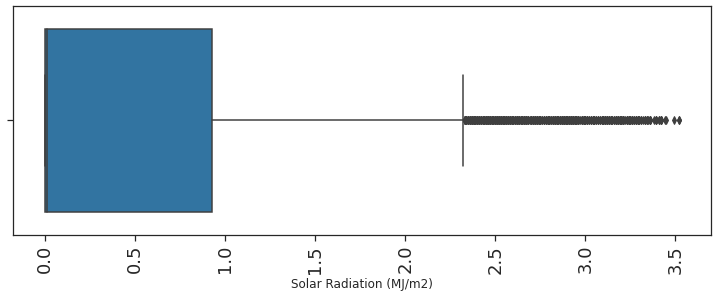

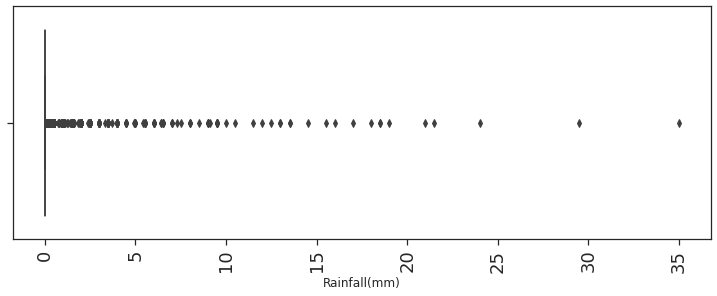

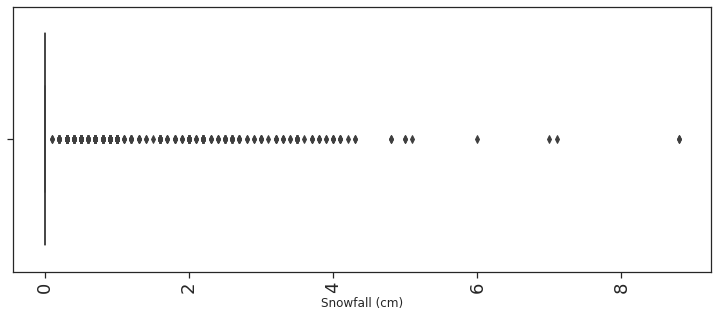

In [103]:
box_plot(value,num_feature)

* Ignoring outliers in snowfall and rainfall since if treated will cause entire value to o zero.

### **Multicollinearity**

---
* Anytime an **independent** variable (feature) has a strong **correlation** with **another independent** variable, that situation is referred to as **multicollinearity**. Although it may not initially appear to be a problem,but as the basic objective of regression analysis is to find correlations between the independent variable and the target variable these features with **high correlation** **can** undoubtedly **introduce** some **errors** into our results.


* In the above heatmap, two independent feature show high correlation of 0.91 - temperature and dew poitn temperature.

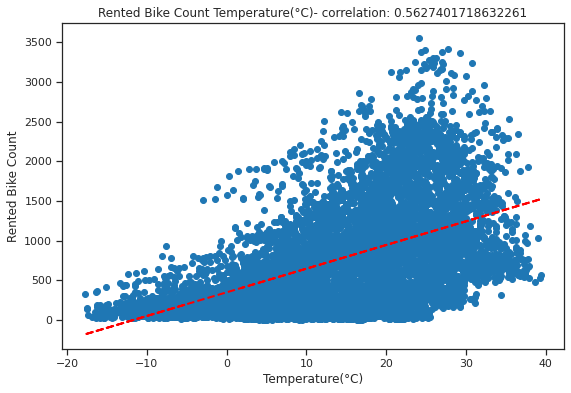

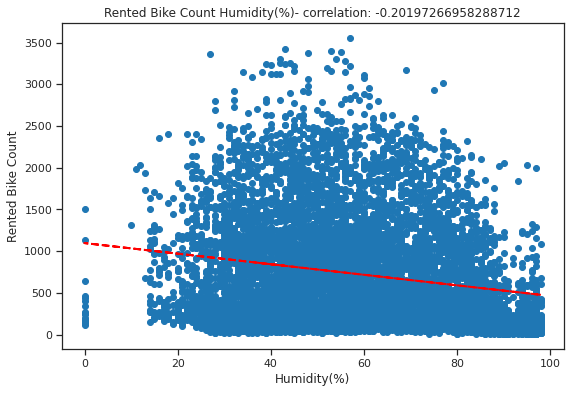

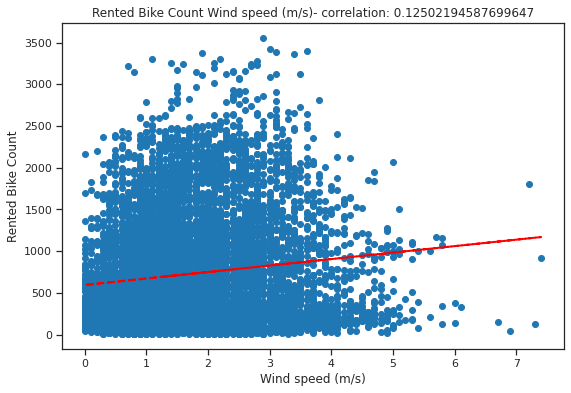

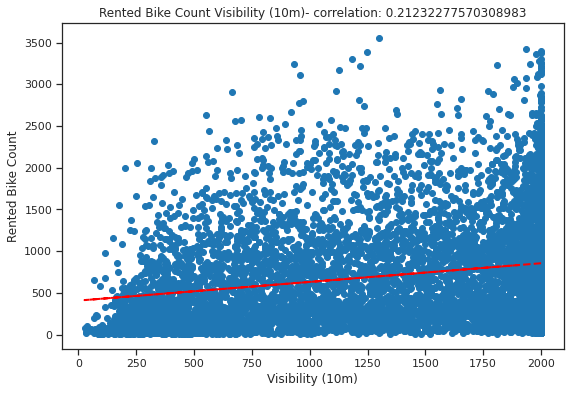

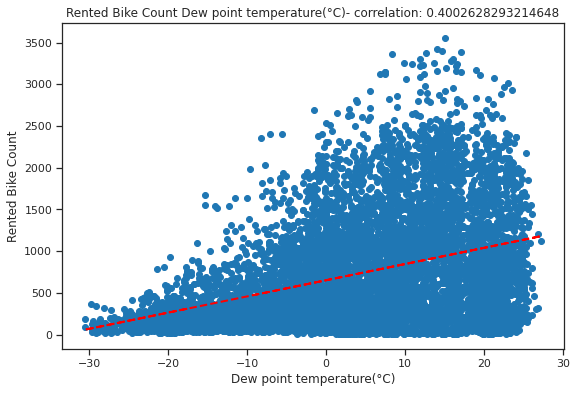

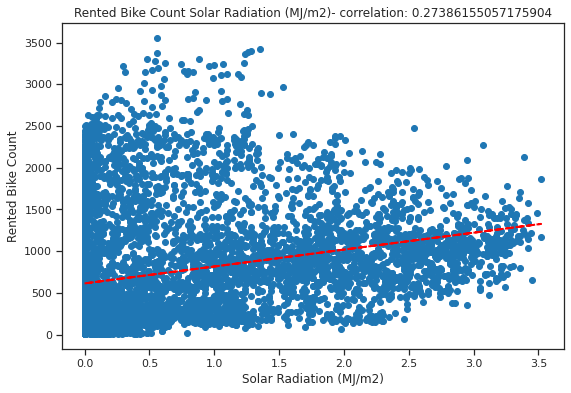

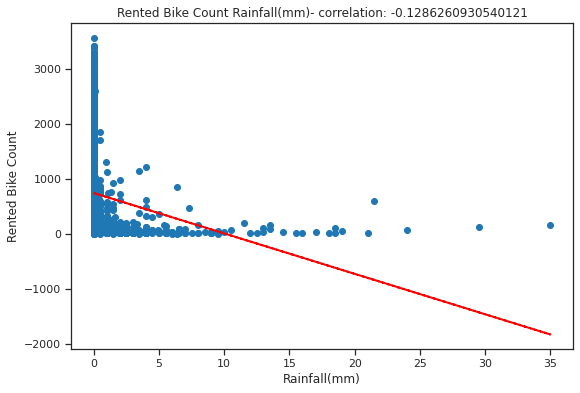

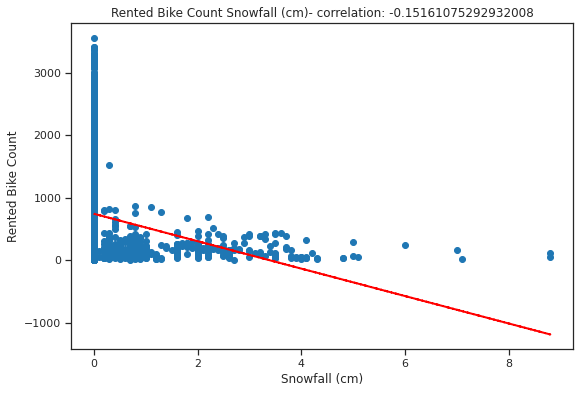

In [104]:
#before removing multicollinearity, drwaing plot to see all other linear realtion
for col in num_feature[0:-1]:
    if col == 'Rented Bike Count':
      pass
    else:
      fig = plt.figure(figsize=(9, 6))
      sns.set_context('notebook')
      ax = fig.gca()
      feature = value[col]
      label = value['Rented Bike Count']
      correlation = feature.corr(label)
      plt.scatter(x=feature, y=label)
      plt.xlabel(col)
      plt.ylabel('Rented Bike Count')
      ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
      z = np.polyfit(value[col], value['Rented Bike Count'], 1)
      y_hat = np.poly1d(z)(value[col])

      plt.plot(value[col], y_hat, "r--", lw=2)

plt.show()

In [105]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [106]:
#calculatin vif
calc_vif(value[[i for i in value.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.103
1,Humidity(%),4.712
2,Wind speed (m/s),4.089
3,Visibility (10m),4.403
4,Solar Radiation (MJ/m2),2.233
5,Rainfall(mm),1.079
6,Snowfall (cm),1.121


* Each feature has VIF score less than 10 which is good for  analysis.

### Catergorizing variable

In [107]:
#since day is categorised as weekday and weekend, dropping day column
value.drop(columns=['day'], inplace=True)

In [108]:
num = value.select_dtypes(exclude ='object')
cat = value.select_dtypes(include ='object')
print(f'numeric : {num.columns.to_list()} \n categorial : {cat.columns.to_list()}')

numeric : ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'] 
 categorial : ['Hour', 'Seasons', 'Holiday', 'month', 'year', 'week']


* since our value has 6 different categorial values, it is better to get them encoded 

In [109]:
#applying label encoder
encoded = value.apply(LabelEncoder().fit_transform)
encoded.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,month,year,week
0,252,0,111,28,22,1779,114,0,0,0,3,1,4,0,0


In [110]:
#encoding using dummies
dumcoded = pd.get_dummies(value,drop_first=True,sparse=True)
dumcoded.head(1)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,...,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,year_2018,week_Weekend
0,254,-5.200,37,2.200,2000,-17.600,0.000,0.000,0.000,0,...,1,0,0,0,0,0,0,0,0,0


* When encoded using dummies, column size is increased to 49. Therefore, using label encoded values in futher process.

### Normalisation

---
As in the above study, Bike Rented count has shown positive skewness, it is better to get it normalised. The purpose of normalisation is to convert the values of the dataset's numeric columns to a standard scale without distorting the distinctions between different value ranges or omitting crucial details. Normalisation can be achieved using different techniques i.e., either taking log, square root or cuberoot for the value


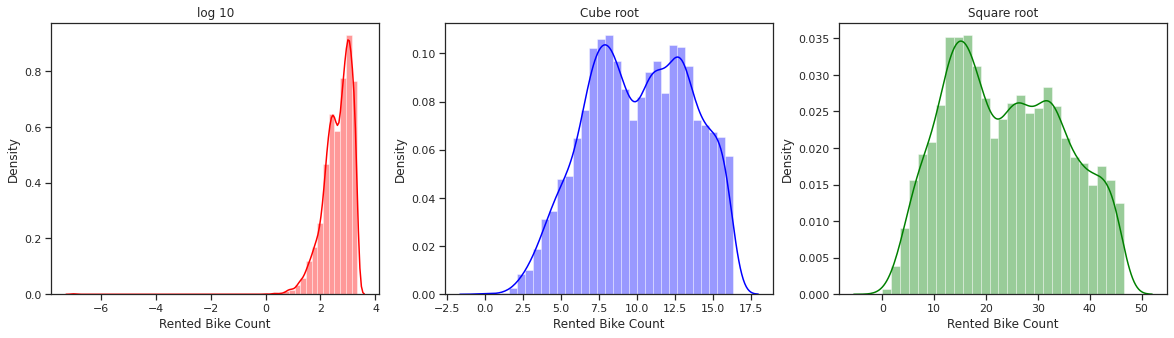

In [111]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10 
sns.distplot(np.log10(encoded['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10");
# here we use cube root 
sns.distplot(np.cbrt(encoded['Rented Bike Count']*2),ax=axes[1],color='blue').set_title("Cube root");
# here we use square root 
sns.distplot(np.sqrt(encoded['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root");

* From the above graph, taking square root shows much promising result, therefore choosing square root method for normalisation.

In [112]:
# applying square root on Rented bike count
encoded['Rented Bike Count']=np.sqrt(encoded['Rented Bike Count'])

## **MODEL TRAINING**

* A model defines the relationship between features and label.A feature is an input variable—the x variable in simple linear regression.A label is the thing we're predicting—the y variable in simple linear regression.Training means creating or learning the model.In order to build the predictive model, it's time to implement some of the model training on the above selected feature. 

Following algorithms have been used for predictions:-

* Linear Regression
* Lasso Regression
* Ridge Regression
* KNeighborsRegressor
* ExtraTreeRegressor
* Random Forest Regression
* GradientBoostingRegressor
* XGB Regression

### **Splitting Data**

In [113]:
#X = independent variable and y = target variable
X=encoded.drop('Rented Bike Count',axis=1)
y=encoded['Rented Bike Count']

In [114]:
#spilitting into test and train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [115]:
print("Shape of X_train ",X_train.shape)
print("Shape of X_test ",X_test.shape)
print("Shape of y_train ",y_train.shape)
print("Shape of y_test ",y_test.shape)

Shape of X_train  (6772, 14)
Shape of X_test  (1693, 14)
Shape of y_train  (6772,)
Shape of y_test  (1693,)


### Applying different algorithm

In [116]:
#scaling feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
models = [
          ['Linear Reg.: ', LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreeRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]          
        ]

In [ ]:
#running the models and getting the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mse(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mse(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [ ]:
#result for model 
results_df = pd.DataFrame(model_data)
results_df

### Optimization 